In [40]:
import pandas as pd
import numpy as np

In [3]:
notas = pd.read_csv("ratings.csv")

In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.shape

(100836, 4)

In [6]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [7]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas['momento'].value_counts()

1459787998    128
1459787997    124
1459787996     85
1459787995     37
828124616      37
             ... 
1241823280      1
1166979121      1
1112713266      1
1112711219      1
1229452291      1
Name: momento, Length: 85043, dtype: int64

In [9]:
data = notas['nota'].value_counts()

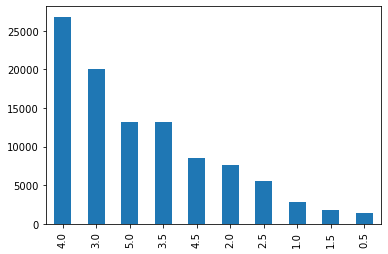

In [10]:
data.plot.bar()

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [12]:
import seaborn as sns

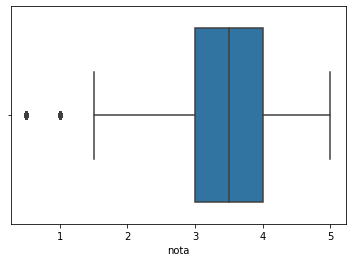

In [13]:
sns.boxplot(notas.nota)

In [14]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeID", "titulo", "generos"]
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
# Media da coluna nota do filme com ID 1

notas.query("filmeID==1").nota.mean()

3.9209302325581397

In [16]:
# Agrupando notas por ID e tirando a media.

medias_por_filme = notas.groupby("filmeID").mean()["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

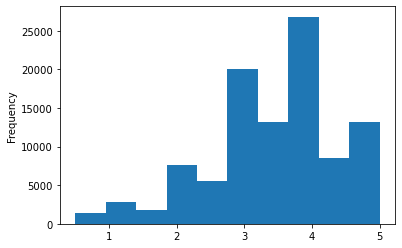

In [17]:
#Avaliando medias de notas.

notas.nota.plot(kind='hist')
notas.nota.describe()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

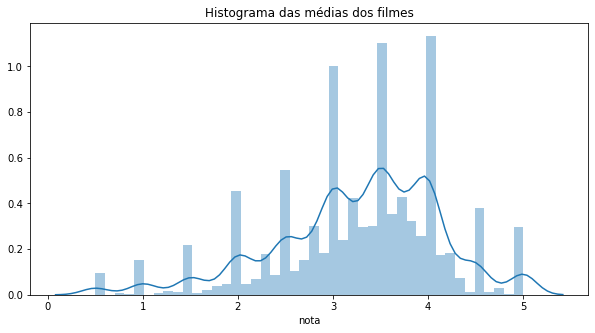

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(medias_por_filme).set_title("Histograma das médias dos filmes")

In [20]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [21]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [23]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


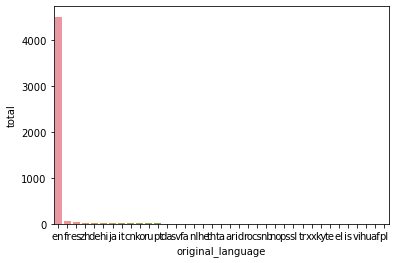

In [24]:
sns.barplot(x="original_language", y="total", data = contagem_de_linguas)

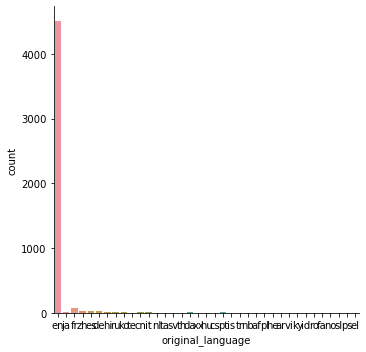

In [25]:
sns.catplot(kind="count", x = "original_language", data = tmdb)

In [26]:
total_por_lingua = tmdb.original_language.value_counts()

In [27]:
total_geral = total_por_lingua.sum()

In [28]:
total_de_ingles = total_por_lingua.loc["en"]

In [29]:
total_resto = total_geral - total_de_ingles

In [30]:
print(total_de_ingles,total_resto)

4505 298


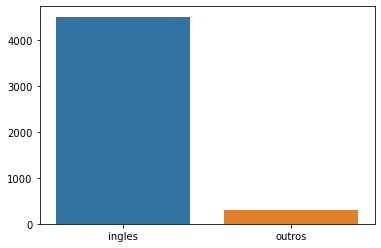

In [31]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_resto]
}

sns.barplot(x='lingua', y='total', data=dados)

In [32]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

In [33]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

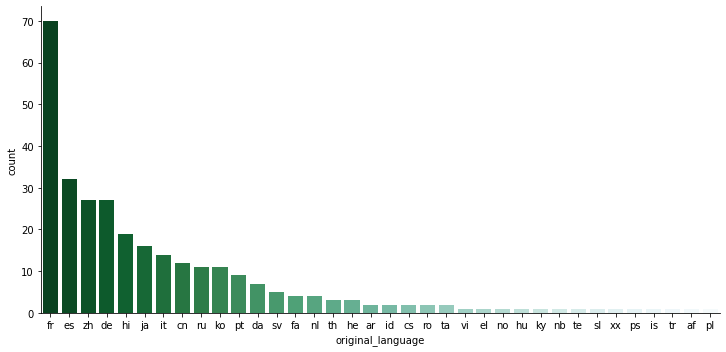

In [34]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count",
            aspect = 2,
            order = total_por_lingua_de_outros_filmes.index,
            palette = "BuGn_r"
           )

In [35]:
filmes.head(2)

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [36]:
notas_do_toy_story = notas.query("filmeID == 1")
notas_do_jumanji  = notas.query("filmeID == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [37]:
notas.head(2)

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [45]:
print("Notas média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Notas média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Notas média do Toy Story 3.92
Notas média do Jumanji 3.43


{'whiskers': [<matplotlib.lines.Line2D at 0x1cdce928390>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdce928a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdce9280b8>,
 'medians': [<matplotlib.lines.Line2D at 0x1cdce935198>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cdce935518>,
 'means': []}

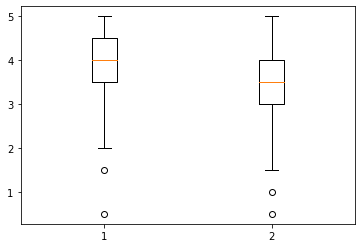

In [46]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])